<span style="font-size:30px; font-family:'Times new roman';">
Import Data 🎒
</span>

In [60]:
import pandas as pd
from IPython.display import display
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [61]:
nvda = pd.read_csv("../data/options_nvda.csv")
spy = pd.read_csv("../data/options_spy.csv")

<span style="font-size:30px; font-family:'Times new roman';">
Explore Data 🤯
</span>

In [62]:
# Log data and observe
display(nvda.info())
display(nvda.head())
display(spy.info())
display(spy.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   contractSymbol     493 non-null    object 
 1   lastTradeDate      493 non-null    object 
 2   strike             493 non-null    float64
 3   lastPrice          493 non-null    float64
 4   bid                493 non-null    float64
 5   ask                493 non-null    float64
 6   change             493 non-null    float64
 7   percentChange      493 non-null    float64
 8   volume             485 non-null    float64
 9   openInterest       493 non-null    int64  
 10  impliedVolatility  493 non-null    float64
 11  inTheMoney         493 non-null    bool   
 12  contractSize       493 non-null    object 
 13  currency           493 non-null    object 
 14  type               493 non-null    object 
 15  expiry             493 non-null    object 
 16  spot               493 non

None

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,type,expiry,spot,dividendYield
0,NVDA250404C00050000,2025-03-28 19:59:24+00:00,50.0,59.73,58.45,60.95,-2.810001,-4.493127,125.0,213,2.343754,True,REGULAR,USD,call,2025-04-04,109.669998,0.04
1,NVDA250404C00055000,2025-03-27 13:41:36+00:00,55.0,54.70,53.50,55.95,-1.380001,-2.460772,1.0,6,2.218754,True,REGULAR,USD,call,2025-04-04,109.669998,0.04
2,NVDA250404C00060000,2025-03-28 15:38:44+00:00,60.0,50.35,48.50,50.95,-3.380001,-6.290715,1.0,17,1.960938,True,REGULAR,USD,call,2025-04-04,109.669998,0.04
3,NVDA250404C00065000,2025-03-28 19:21:04+00:00,65.0,45.10,43.50,45.95,-1.900001,-4.042556,15.0,31,1.718751,True,REGULAR,USD,call,2025-04-04,109.669998,0.04
4,NVDA250404C00070000,2025-03-28 14:38:02+00:00,70.0,39.70,38.80,40.65,-2.700001,-6.367926,61.0,245,1.500002,True,REGULAR,USD,call,2025-04-04,109.669998,0.04


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   contractSymbol     1182 non-null   object 
 1   lastTradeDate      1182 non-null   object 
 2   strike             1182 non-null   float64
 3   lastPrice          1182 non-null   float64
 4   bid                1182 non-null   float64
 5   ask                1182 non-null   float64
 6   change             1182 non-null   float64
 7   percentChange      1182 non-null   float64
 8   volume             1153 non-null   float64
 9   openInterest       1182 non-null   int64  
 10  impliedVolatility  1182 non-null   float64
 11  inTheMoney         1182 non-null   bool   
 12  contractSize       1182 non-null   object 
 13  currency           1182 non-null   object 
 14  type               1182 non-null   object 
 15  expiry             1182 non-null   object 
 16  spot               1182 

None

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,type,expiry,spot,dividendYield
0,SPY250404C00375000,2025-03-28 15:59:41+00:00,375.0,183.34,179.54,180.74,-5.230011,-2.773512,8.0,3,1.150395,True,REGULAR,USD,call,2025-04-04,555.659973,1.19
1,SPY250404C00380000,2025-03-28 19:54:30+00:00,380.0,176.50,174.56,175.75,-4.710007,-2.599198,1.0,0,1.128911,True,REGULAR,USD,call,2025-04-04,555.659973,1.19
2,SPY250404C00400000,2025-03-26 14:23:59+00:00,400.0,173.29,154.60,155.38,0.000000,0.000000,2.0,21,0.000010,True,REGULAR,USD,call,2025-04-04,555.659973,1.19
3,SPY250404C00410000,2025-03-17 13:41:06+00:00,410.0,155.91,144.57,145.78,0.000000,0.000000,NaN,0,0.951172,True,REGULAR,USD,call,2025-04-04,555.659973,1.19
4,SPY250404C00415000,2025-03-07 15:49:08+00:00,415.0,158.29,139.58,140.78,0.000000,0.000000,1.0,0,0.917970,True,REGULAR,USD,call,2025-04-04,555.659973,1.19


In [63]:
# change Expiry type to datetime for checking it with conditions
nvda['expiry'] = pd.to_datetime(nvda['expiry'])
spy['expiry'] = pd.to_datetime(spy['expiry'])

In [64]:
# core features correction check
display(nvda[(nvda['bid'] < 0) | (nvda['ask'] < 0)]) # check any rows have bid or ask price less than 0
display(nvda[(nvda['expiry']) < datetime.today()]) # check any expiry date have been passed today
display(nvda[(nvda['impliedVolatility']) < 0]) # check any rows have implied volatility less than 0
display(spy[(spy['bid'] < 0) | (spy['ask'] < 0)])
display(spy[(spy['expiry']) < datetime.today()])
display(spy[(spy['impliedVolatility']) < 0])

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,type,expiry,spot,dividendYield


,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,type,expiry,spot,dividendYield


,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,type,expiry,spot,dividendYield


,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,type,expiry,spot,dividendYield


,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,type,expiry,spot,dividendYield


,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,type,expiry,spot,dividendYield


In [65]:
# add mid price column to represent average price of each option ontract
nvda['AveragePrice'] = (nvda['bid'] + nvda['ask']) / 2
spy['AveragePrice'] = (spy['bid'] + spy['ask']) / 2

In [66]:
# added time to maturity column (in # of days / 365)
def calculateTimeToMaturity(e):
    return max((e - datetime.today()).days / 365, 0)

nvda['ttm'] = nvda['expiry'].apply(calculateTimeToMaturity)
spy['ttm'] = spy['expiry'].apply(calculateTimeToMaturity)

In [67]:
display(nvda.iloc[:5, [2,4,5,18,19]])
display(spy.iloc[-5:, [2,4,5,18,15,19]])

,strike,bid,ask,AveragePrice,ttm
0,50.0,58.45,60.95,59.700,0.010959
1,55.0,53.50,55.95,54.725,0.010959
2,60.0,48.50,50.95,49.725,0.010959
3,65.0,43.50,45.95,44.725,0.010959
4,70.0,38.80,40.65,39.725,0.010959


,strike,bid,ask,AveragePrice,expiry,ttm
1177,620.0,63.52,66.97,65.245,2025-04-25,0.068493
1178,625.0,68.52,71.97,70.245,2025-04-25,0.068493
1179,630.0,73.52,76.97,75.245,2025-04-25,0.068493
1180,635.0,78.52,81.97,80.245,2025-04-25,0.068493
1181,645.0,88.52,91.97,90.245,2025-04-25,0.068493


In [68]:
display(nvda.iloc[:, [2,15,8,9]])

,strike,expiry,volume,openInterest
0,50.0,2025-04-04,125.0,213
1,55.0,2025-04-04,1.0,6
2,60.0,2025-04-04,1.0,17
3,65.0,2025-04-04,15.0,31
4,70.0,2025-04-04,61.0,245
...,...,...,...,...
488,150.0,2025-04-25,57.0,0
489,155.0,2025-04-25,6.0,0
490,160.0,2025-04-25,4.0,0
491,165.0,2025-04-25,NaN,1


<span style="font-size:25px; font-family:'Times new roman';">
Open Interest
</span>
<span style="font-size:15px; font-family:'Times new roman';">
 = The total number of active options contracts that are open and not yet closed or exercised

It increases when new options are opened and decreases when options are closed, exercised, or expire --> using for filter liquid Options --> avoid illiquid options in modeling

Only gonna consider options that have OI and Volume > 0.05% of max OI and Volume > 5
</span>


In [69]:
print("Biggest nvda OI =" ,nvda['openInterest'].max(), "Biggest spy OI =" ,spy['openInterest'].max())
nvda = nvda[(nvda['openInterest'] > math.ceil(0.00005*nvda['openInterest'].max())) & (nvda['volume'] > 5)]
spy = spy[(spy['openInterest'] > math.ceil(0.00005*spy['openInterest'].max())) & (spy['volume'] > 5)]

Biggest nvda OI = 199377 Biggest spy OI = 125852


In [70]:
print("# of nvda remain =" ,len(nvda),"\n# of spy remain =" ,len(spy))

# of nvda remain = 389 
# of spy remain = 856


<span style="font-size:30px; font-family:'Times new roman';">
Inspect distribution of key features 👀
</span>

<span style="font-size:15px; font-family:'Times new roman';">

To understand the shape of the option pricing curve, how market prices of options change across different strikes at the same expiry.

Mid price Vs Strike(S) to confirms data behaves as aspected

Implied Volatility(IV) Vs Strike(S) : in actual market it shouldn't flat (smile or skew)
</span>

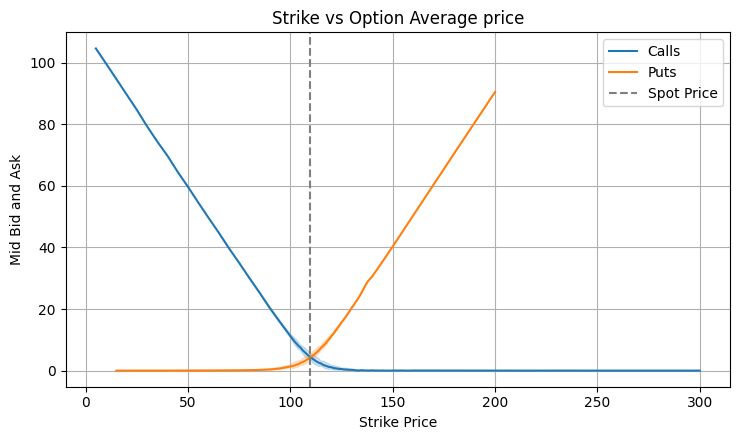

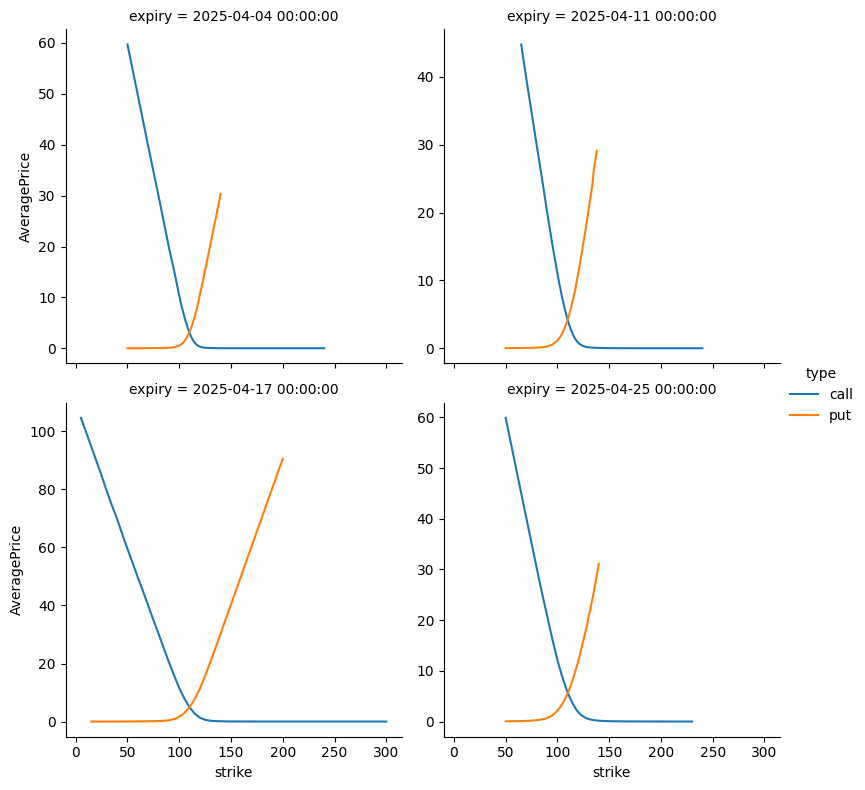

In [74]:
temp = nvda

plt.figure(figsize=(7.5, 4.5))
sns.lineplot(data=temp[temp['type'] == 'call'], x='strike', y='AveragePrice', label='Calls')
sns.lineplot(data=temp[temp['type'] == 'put'], x='strike', y='AveragePrice', label='Puts')

spot = nvda['spot'].iloc[0]
plt.axvline(spot, linestyle='--', color='gray', label='Spot Price')

plt.title(f"Strike vs Option Average price")
plt.xlabel("Strike Price")
plt.ylabel("Mid Bid and Ask")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
g = sns.FacetGrid(temp, col='expiry', hue='type', col_wrap=2, height=4, sharey=False)
g.map(sns.lineplot, 'strike', 'AveragePrice').add_legend()

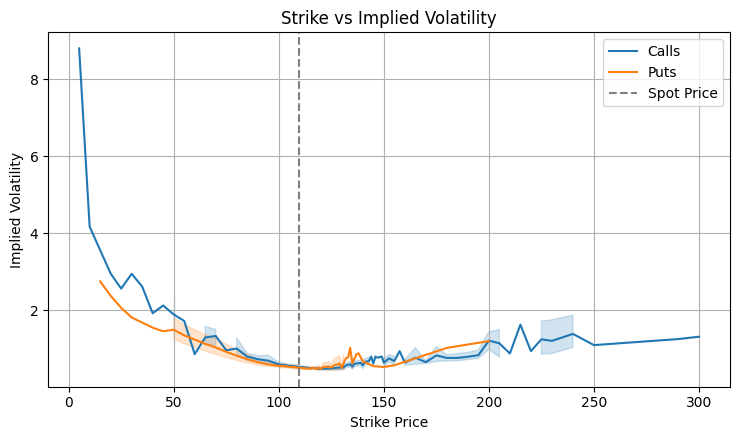

In [75]:
plt.figure(figsize=(7.5, 4.5))
sns.lineplot(data=temp[temp['type'] == 'call'], x='strike', y='impliedVolatility', label='Calls')
sns.lineplot(data=temp[temp['type'] == 'put'], x='strike', y='impliedVolatility', label='Puts')

plt.axvline(spot, linestyle='--', color='gray', label='Spot Price')

plt.title(f"Strike vs Implied Volatility")
plt.xlabel("Strike Price")
plt.ylabel("Implied Volatility")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

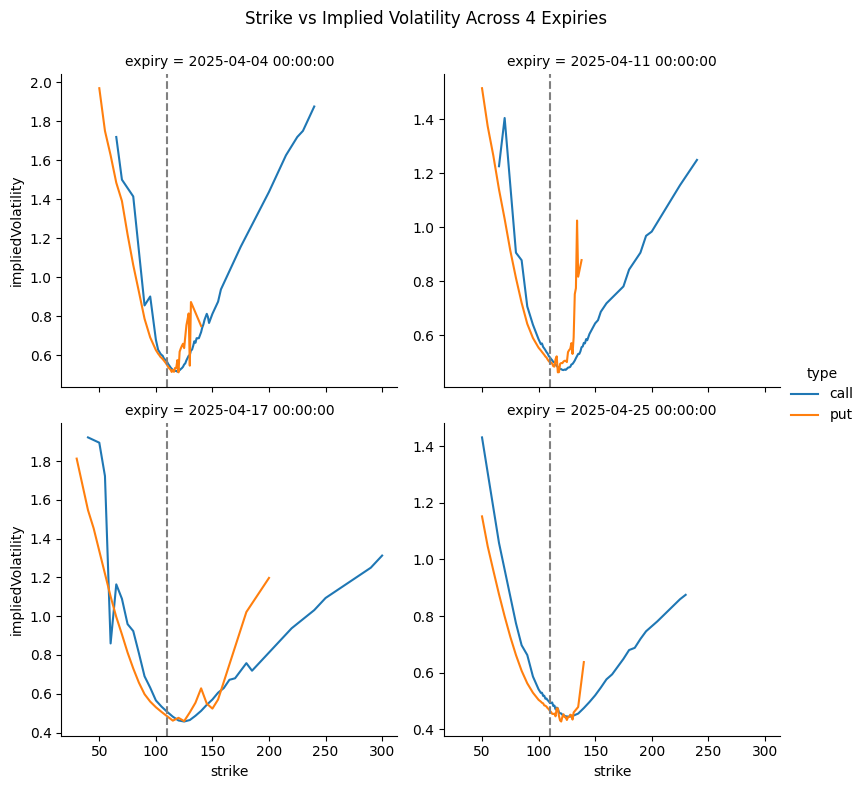

In [76]:
# from plot above, should filter spike noice at ends
nvda = nvda[(nvda["impliedVolatility"] > 0) & (nvda["impliedVolatility"]< 2)]

temp = nvda
g = sns.FacetGrid(temp, col='expiry', col_wrap=2, height=4, sharey=False, hue='type')
g.map(sns.lineplot, 'strike', 'impliedVolatility').add_legend()
for ax in g.axes.flatten():
    ax.axvline(temp['spot'].iloc[0], color='gray', linestyle='--', label='Spot Price')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Strike vs Implied Volatility Across 4 Expiries')
plt.show()